# Exercise 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [2]:
def random_walk(steps, self_avoiding=False, output=False):
    x = np.zeros(steps)
    y = np.zeros(steps)
    distance = np.zeros(steps)

    loop_stationary = 0 # variable counting loop cycles walker has not moved
    max_stationary = 10

    if self_avoiding:
        i = 1
        #new_x = 0
        #new_y = 0
        while i < steps:
            # if it is stuck set rest to last location
            if loop_stationary >= max_stationary:
                x[i:] = x[i-1]
                y[i:] = y[i-1]
                if output:
                    print(f'walker died after {i} steps')
                i = steps
                break

            random_var = rand()
            if random_var < .25:
                new_x = x[i-1]+1
                new_y = y[i-1]
            elif random_var < .5:
                new_x = x[i-1]
                new_y = y[i-1]+1
            elif random_var < .75:
                new_x = x[i-1]-1
                new_y = y[i-1]
            else:
                new_x = x[i-1]
                new_y = y[i-1]-1
            # check if walker has been there before
            has_been_there = False
            for j in range(0, i+1):
                if new_x == x[j] and new_y == y[j]:
                    has_been_there = True
                    break
                #endif
            #endfor
            if has_been_there:
                loop_stationary = loop_stationary + 1
                continue
            else:
                x[i] = new_x
                y[i] = new_y
                loop_stationary = 0

            i = i + 1
        #endwhile
        distance = np.sqrt(np.power(x, 2) + np.power(y,2))
        return x,y, distance
    #endif


    for i in range(1,steps):
        random_var = rand()
        if random_var < .25:
            x[i] = x[i-1]+1
            y[i] = y[i-1]
            continue
        if random_var < .5:
            x[i] = x[i-1]
            y[i] = y[i-1]+1
            continue
        if random_var < .75:
            x[i] = x[i-1]-1
            y[i] = y[i-1]
            continue
        x[i] = x[i-1]
        y[i] = y[i-1]-1
        
    distance = np.sqrt(np.power(x, 2) + np.power(y,2))
    return x,y, distance

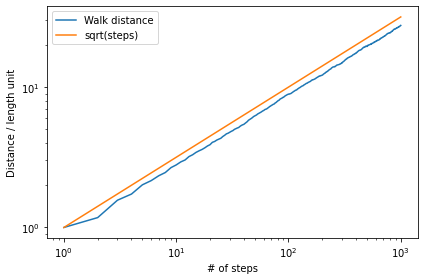

In [3]:
# self crossing
# plotting many walks
def plot_walks(amount_plots, steps, self_avoiding=False, output=False):
    for i in range(0, amount_plots):
        x, y, distance = random_walk(steps, self_avoiding=self_avoiding, output=output)
        plt.plot(x,y, alpha=.5)
        
walks = 8
steps = 1000
plot_walks(walks, steps)
plt.tight_layout()
plt.savefig('build/many_walks.pdf')

plt.clf()

def distance_average(walks, steps, self_avoiding=False):
    data = np.zeros((walks, steps))
    for i in range(0, walks):
        x,y, data[i, :] = random_walk(steps, self_avoiding=self_avoiding)
    average = np.mean(data, axis=0)
    return average

walks = 1000
steps = 1000
dist = distance_average(walks, steps)

t = np.arange(1,steps,1)
plt.plot(t, dist[1:], label='Walk distance')
plt.plot(t, np.sqrt(t), label=rf'sqrt(steps)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('# of steps')
plt.ylabel('Distance / length unit')
#plt.title(f'Distance averaged over {walks} walks')

plt.legend()
plt.tight_layout()

plt.savefig('build/Steps-Distance.pdf')
 

## Self avoiding walker

Now doing it for saw
walker died after 40 steps
walker died after 144 steps
walker died after 26 steps
walker died after 26 steps
walker died after 52 steps


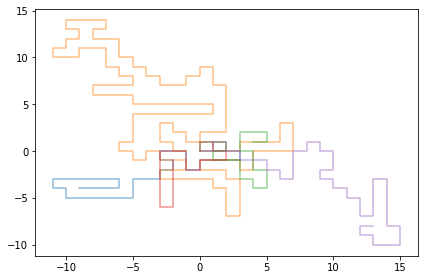

In [4]:
# self avoiding
print('Now doing it for saw')

# plotting many walks
plt.clf()
walks = 5
steps = 1000
plot_walks(walks, steps, self_avoiding=True, output=True)
plt.tight_layout()
plt.savefig('build/many_walks-SAW.pdf')

Average over many walks for distance_saw
d_saw = 1.6216201480823567 \pm 0.005316402093760214


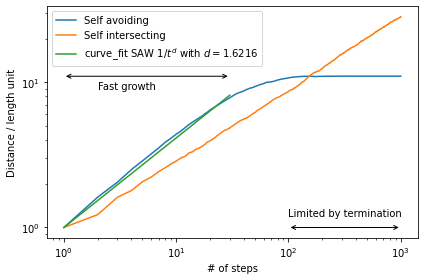

In [46]:
# calculating distance
plt.clf()

print('Average over many walks for distance_saw')
walks = 1000
dist_saw = distance_average(walks, steps, self_avoiding=True)
dist = distance_average(walks, steps, self_avoiding=False)

# making a curve fit to guess the 'dimension'
def R(t, d):
    return np.power(t, 1/d)

from scipy.optimize import curve_fit

t = np.arange(1,steps,1)

limit = 30
limited_dist_saw = dist_saw[1:limit+1]
t_limited = t[0:limit]

popt_saw, pcov_saw = curve_fit(R, t_limited, limited_dist_saw, p0=2)
d_saw = popt_saw[0]
error = np.sqrt(np.diag(pcov_saw))
d_saw_stddev = error[0]
print(f'd_saw = {d_saw} \pm {d_saw_stddev}')

plt.plot(t, dist_saw[1:], label='Self avoiding')
plt.plot(t, dist[1:], label='Self intersecting')
#plt.plot(t, np.sqrt(t), label=rf'sqrt(steps)')
plt.plot(t_limited, R(t_limited, d_saw), label=rf'curve_fit SAW $1/t^d$ with $d={d_saw:.4f}$')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('# of steps')
plt.ylabel('Distance / length unit')
#plt.title(f'Distance averaged over {walks} walks')

# anotionas about areas
plt.annotate(text='', xy=(1,11), xytext=(30,11), arrowprops=dict(arrowstyle='<->'))
plt.text(2,9, 'Fast growth')
plt.annotate(text='', xy=(100,1), xytext=(1000,1), arrowprops=dict(arrowstyle='<->'), horizontalalignment="center")
plt.text(100, 1.2, 'Limited by termination')

plt.legend()
plt.tight_layout()

plt.savefig('build/Steps-Distance-SAW.pdf')